## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [65]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.4f" % x)


# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

#### Training dataset overview

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

#### Test dataset overview

In [4]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


<IPython.core.display.Javascript object>

### Checking the shape of the data

In [6]:
data_train = df.copy()
data_test = df_test.copy()
print("Train dataset shape:", data_train.shape)
print("Test dataset shape:", data_test.shape)

Train dataset shape: (20000, 41)
Test dataset shape: (5000, 41)


<IPython.core.display.Javascript object>

**Observations:**
- The train dataset has 20000 rows and 41 columns.
- The test dataset has 5000 rows and 41 columns

### Checking datatype of the dataset

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

**Observations:**
- The train data are all numerical.

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

**Observations:**
- The test data are all numerical.

### Checking Duplication

In [9]:
print(
    f"Number of missing data in the training dataset: {data_train.duplicated().sum()}"
)
print(f"Number of missing data in the test dataset: {data_test.duplicated().sum()}")

Number of missing data in the training dataset: 0
Number of missing data in the test dataset: 0


<IPython.core.display.Javascript object>

**Observations:**
- No duplication

### Checking for missing data

In [15]:
# checking for missing data in training set
data_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
- There are some missing data in the train dataset and require missing data treatment.

In [17]:
# checking for missing data in test set
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
- There are some missing data in the test set and require missing data treatment.

### Statistical Summary

In [10]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

In [11]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

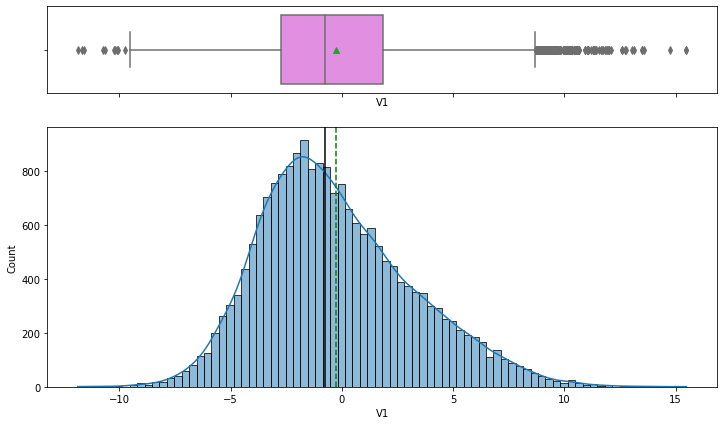

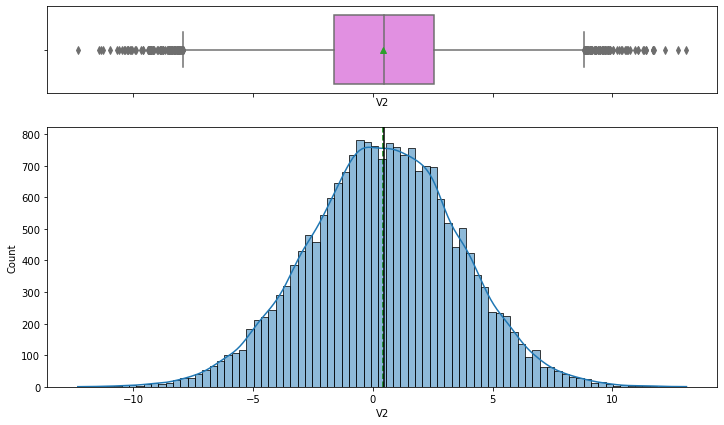

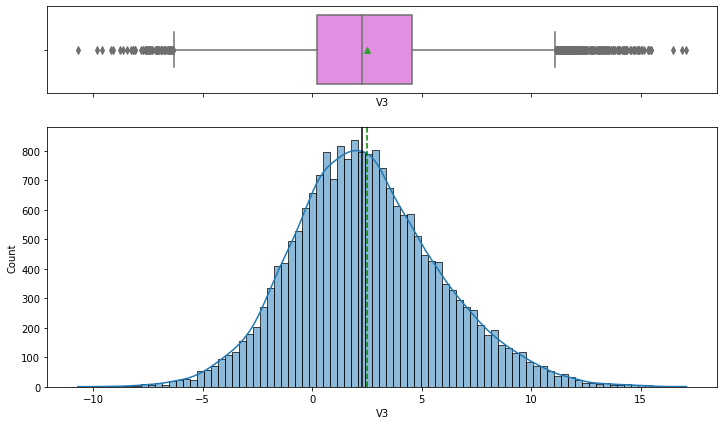

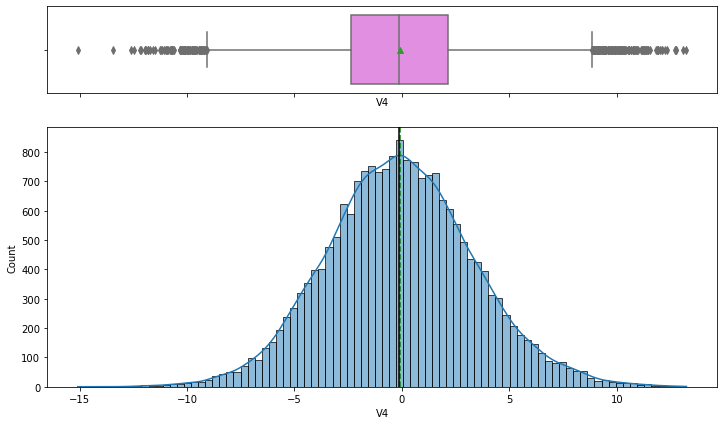

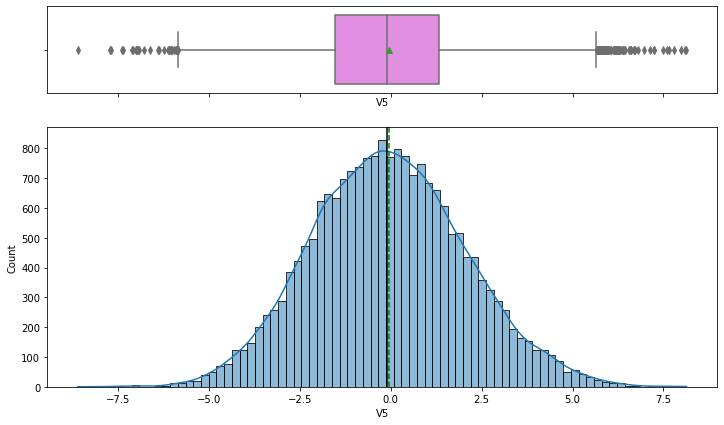

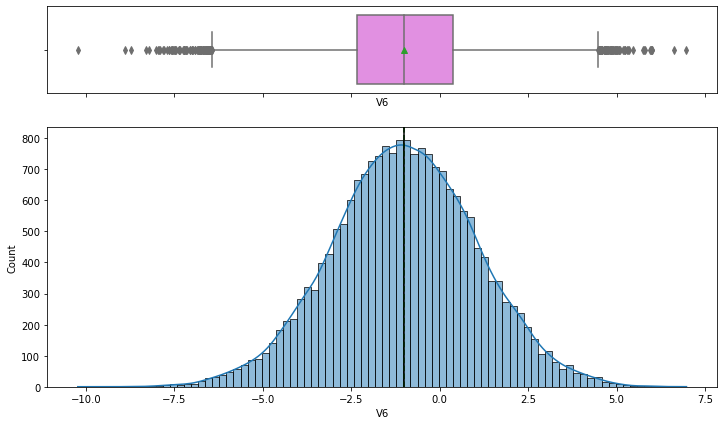

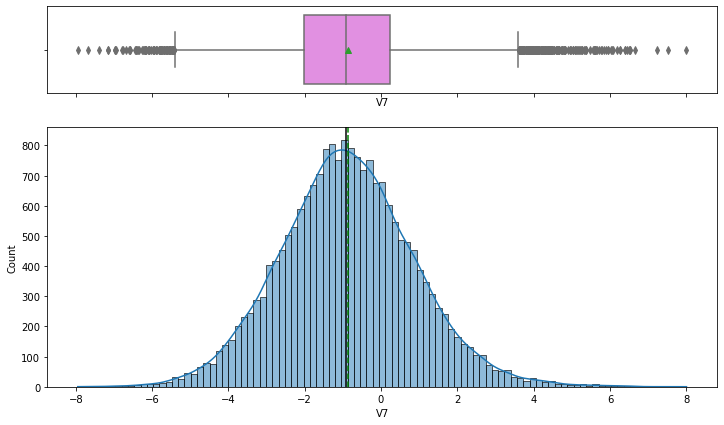

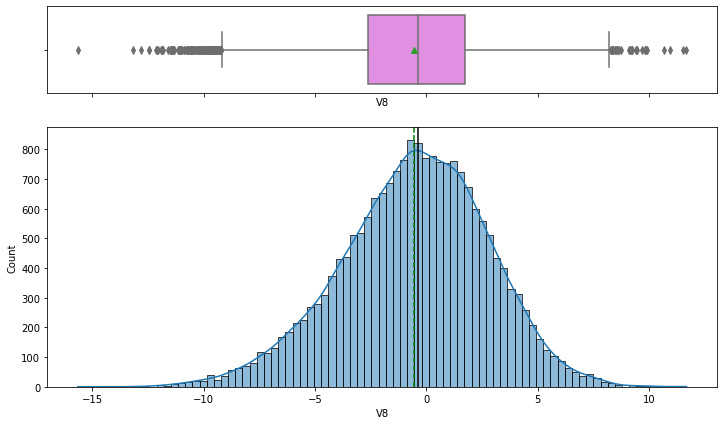

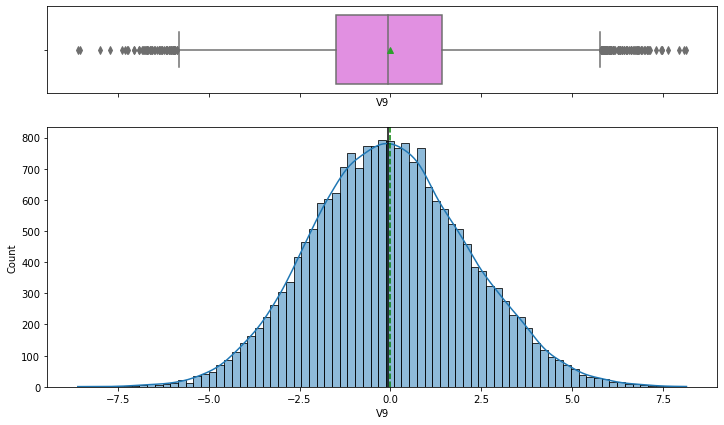

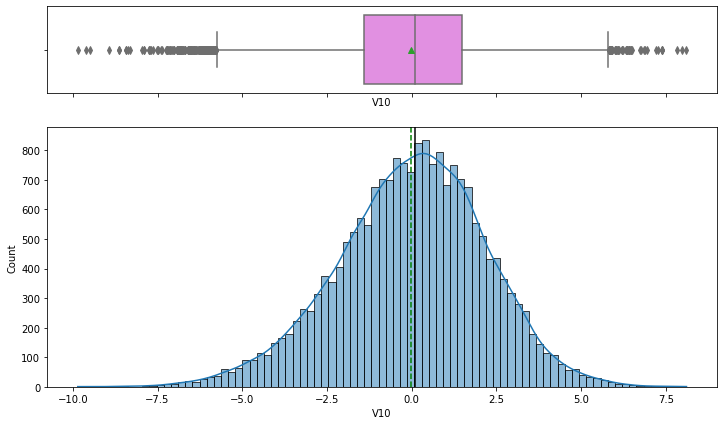

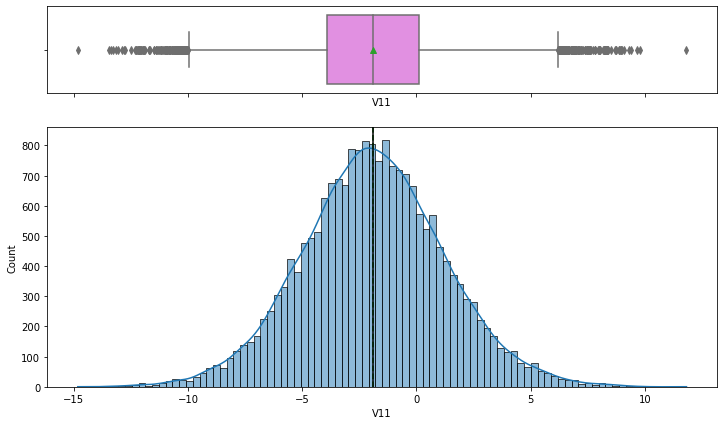

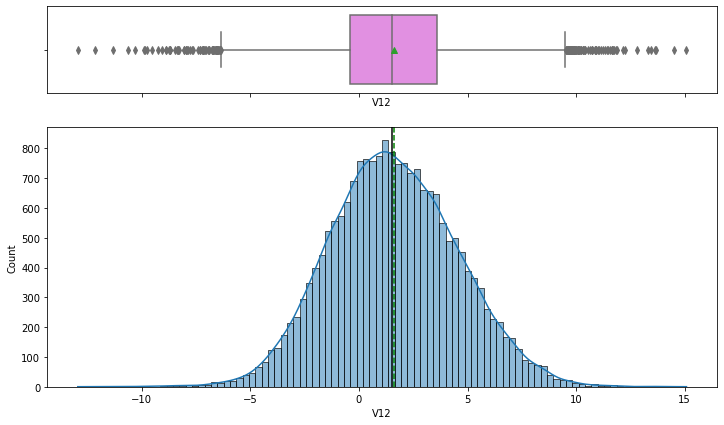

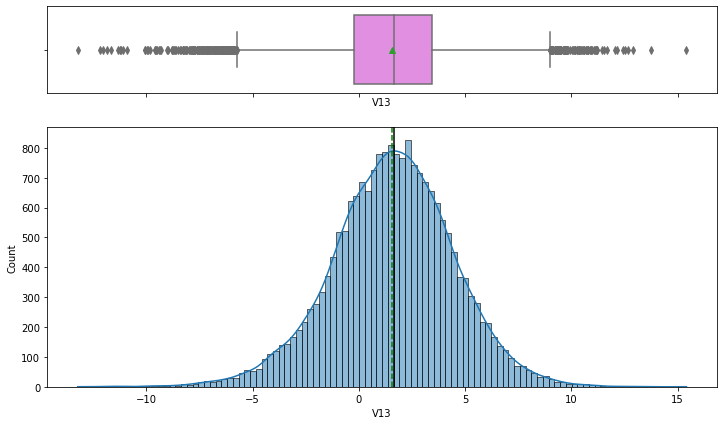

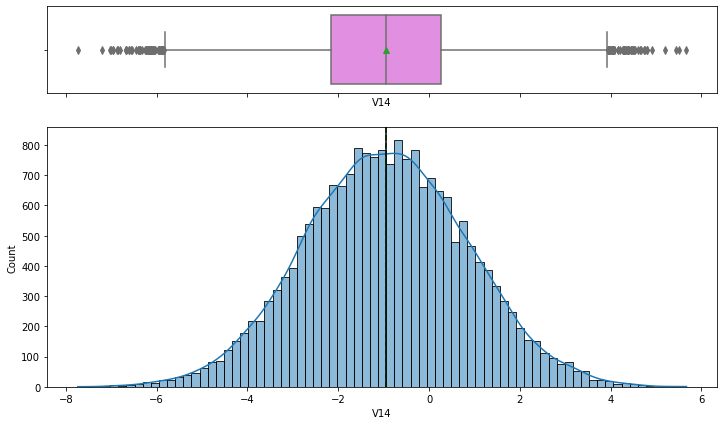

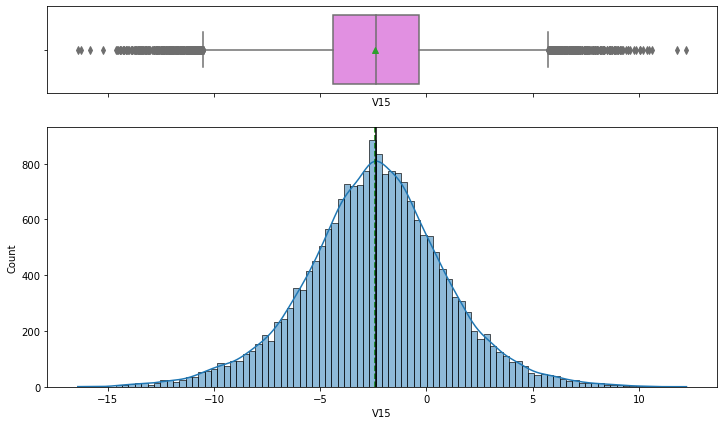

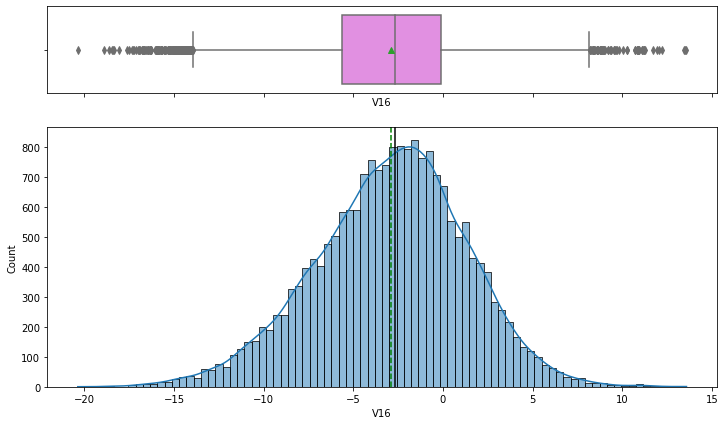

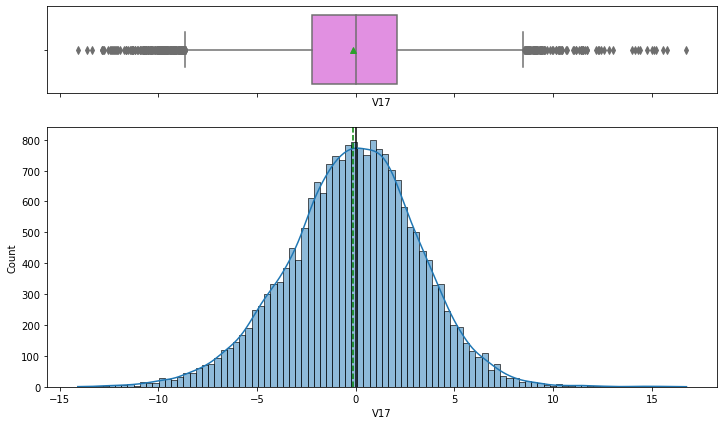

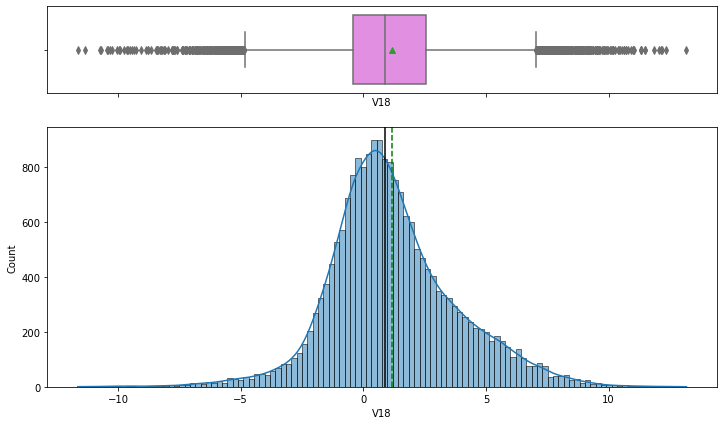

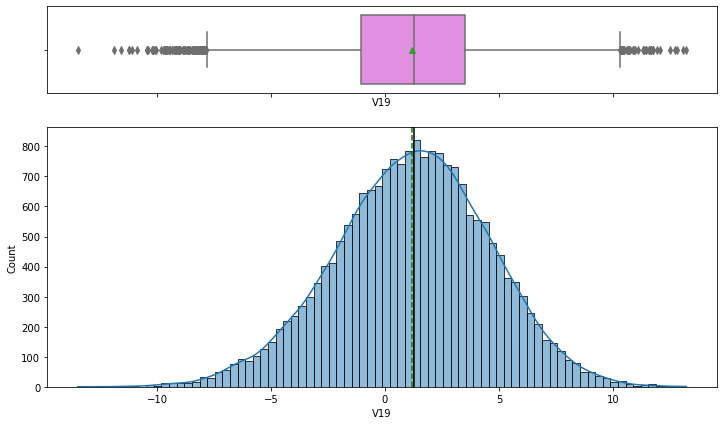

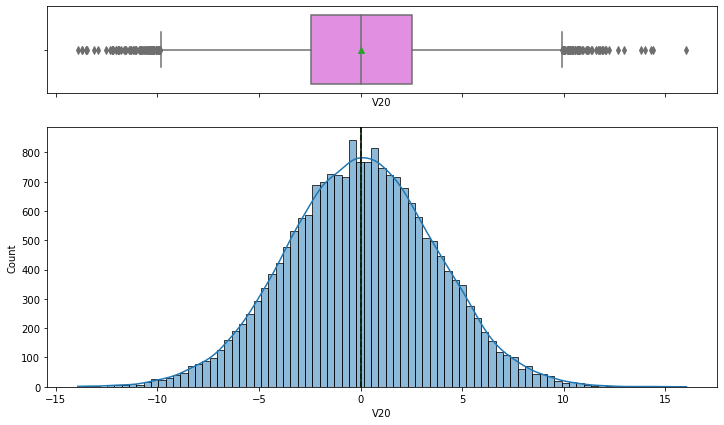

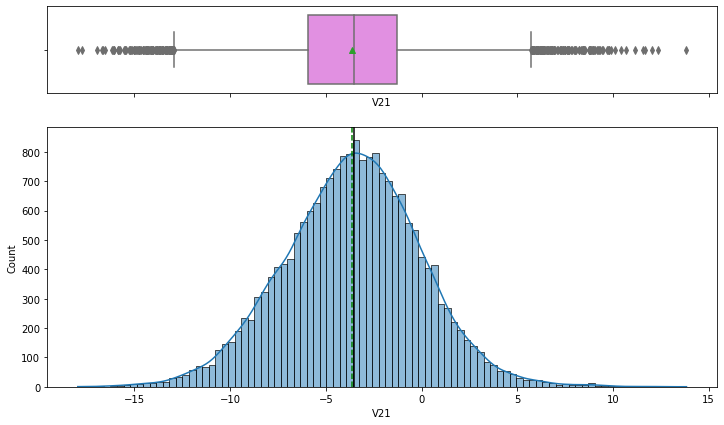

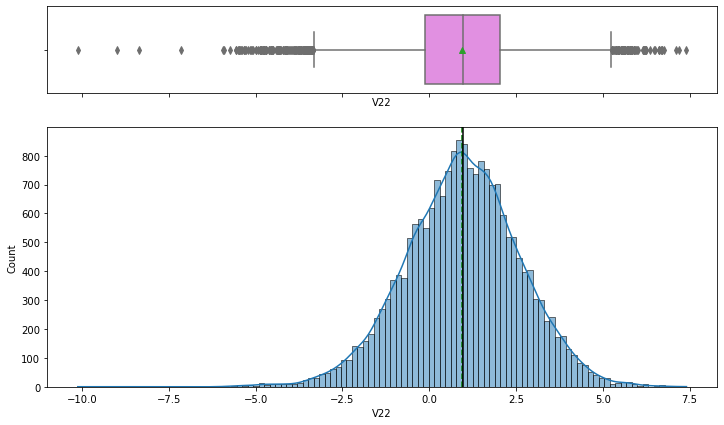

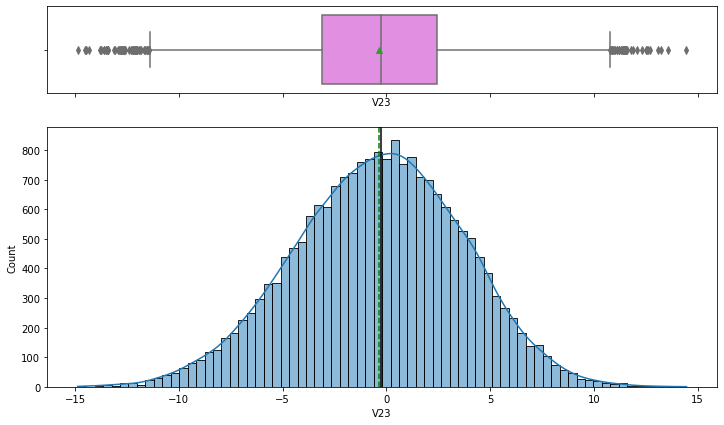

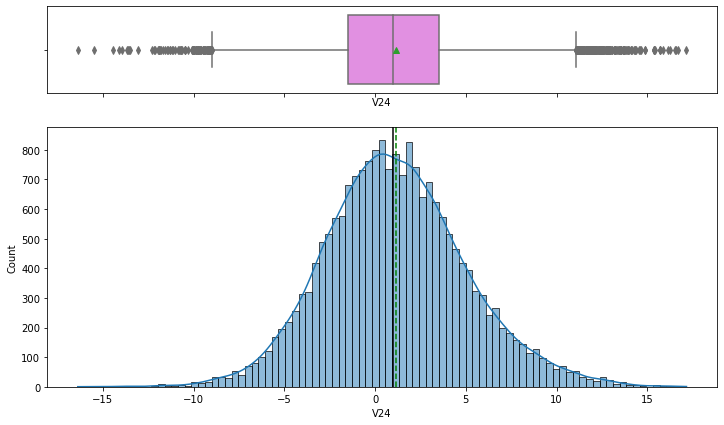

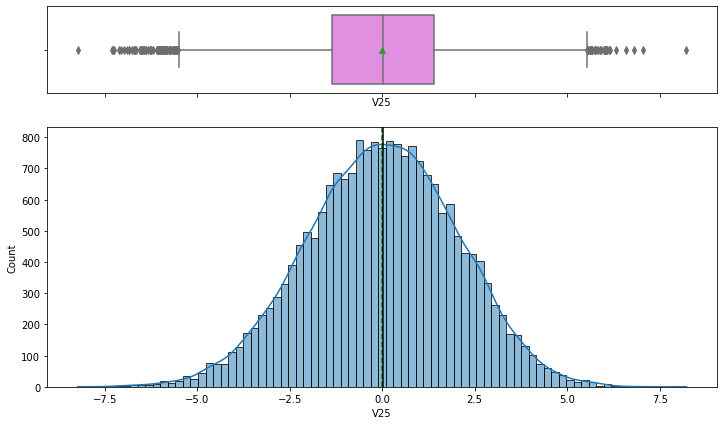

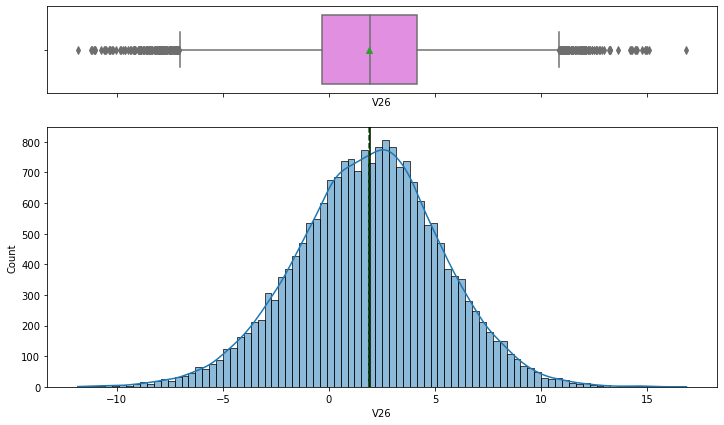

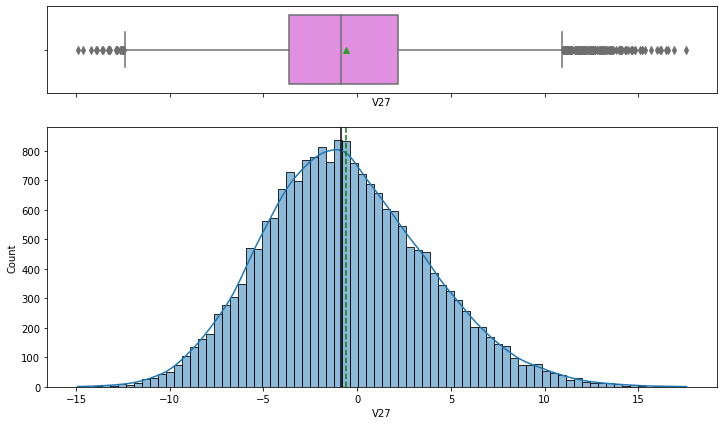

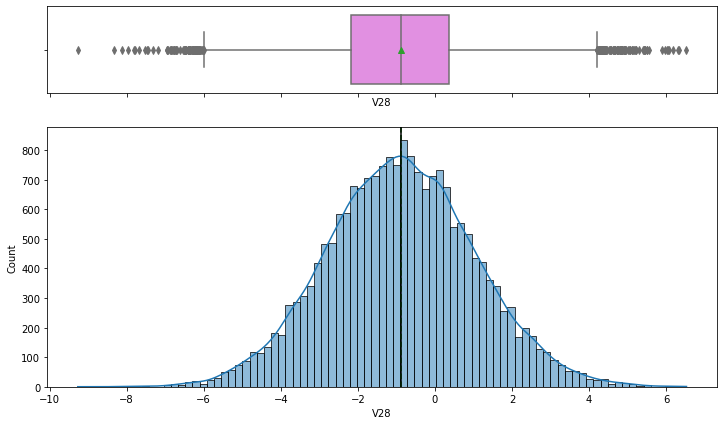

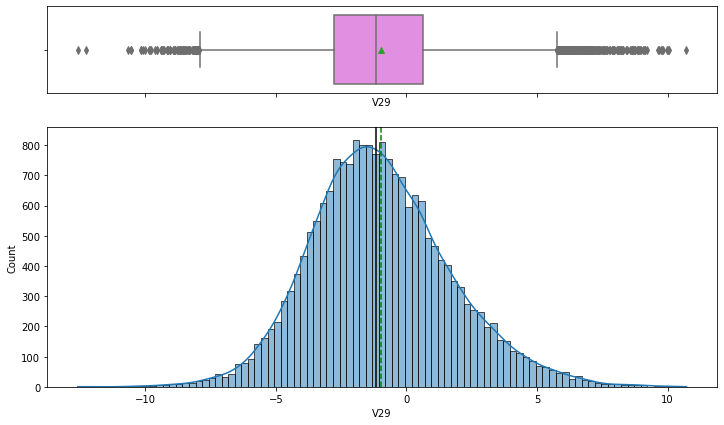

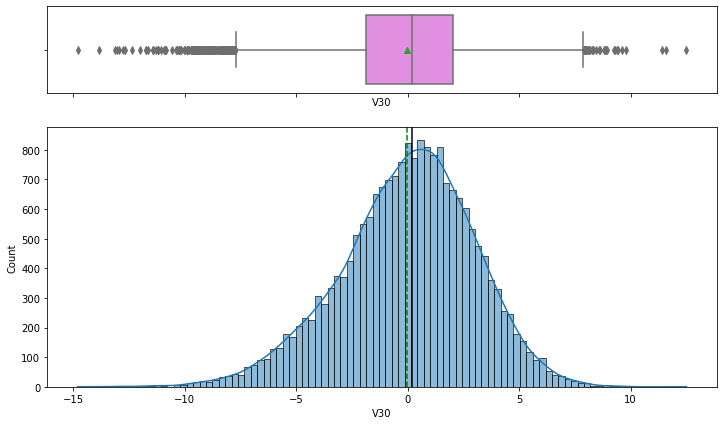

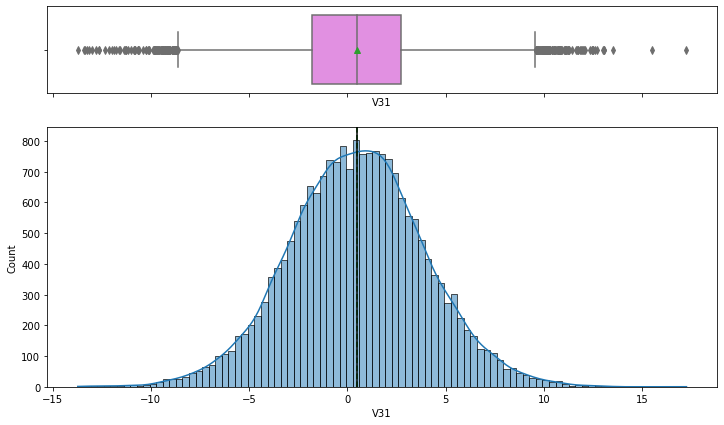

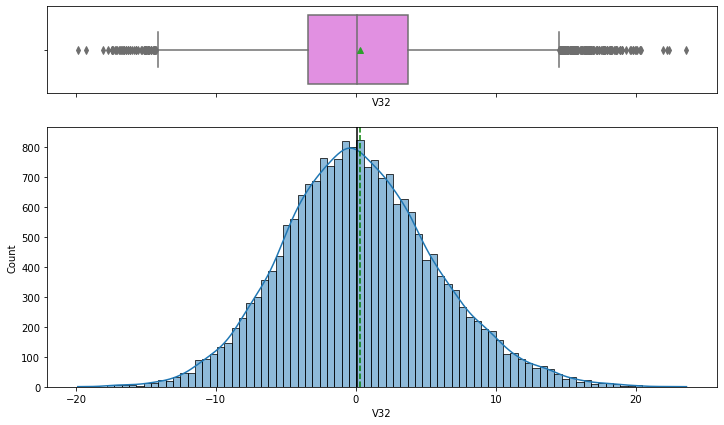

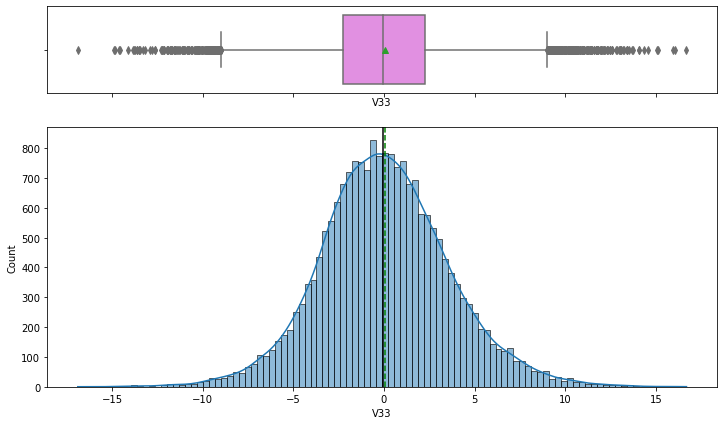

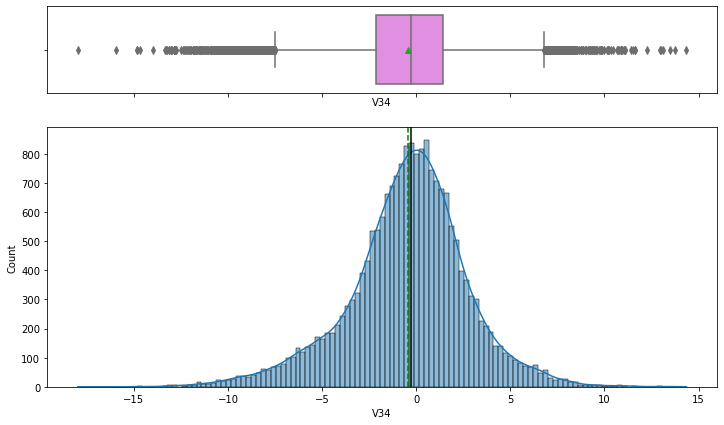

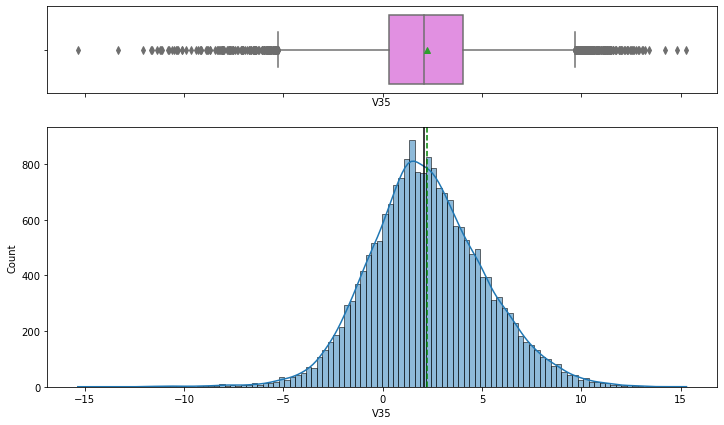

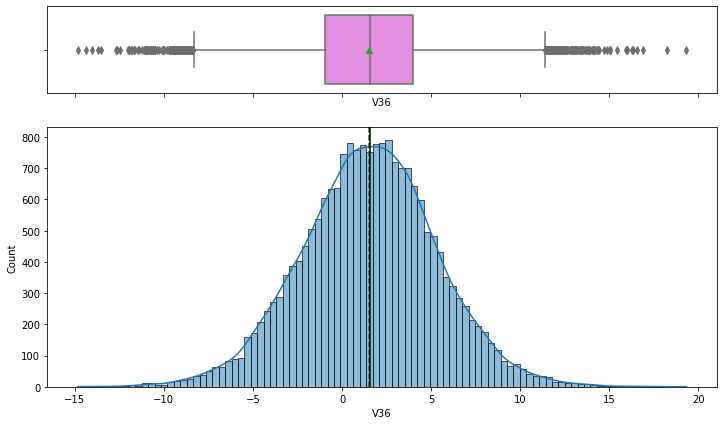

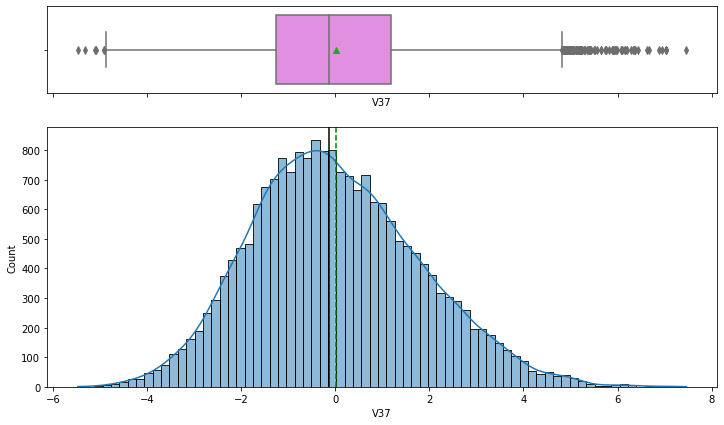

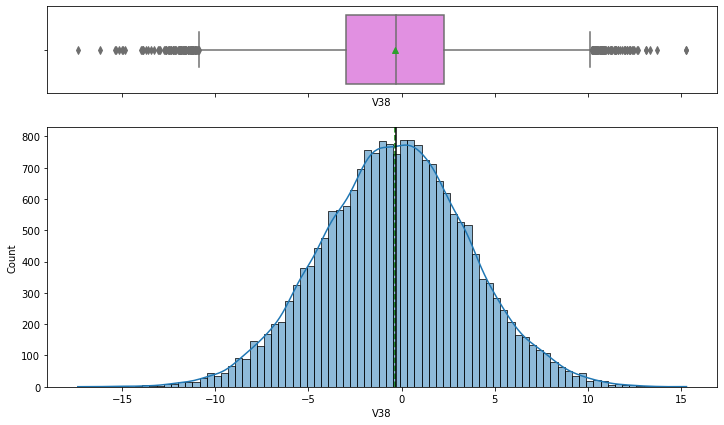

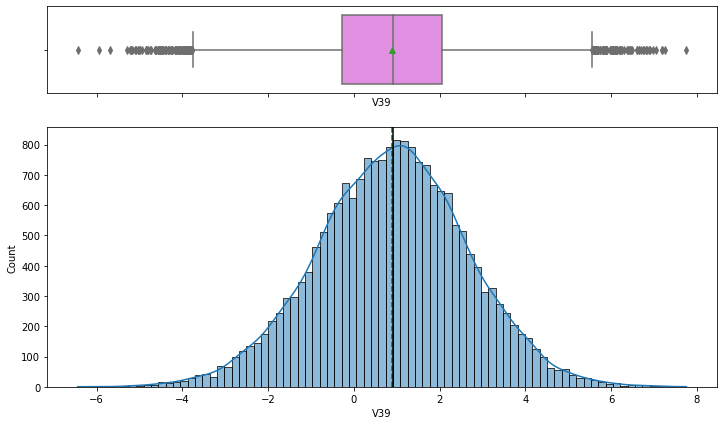

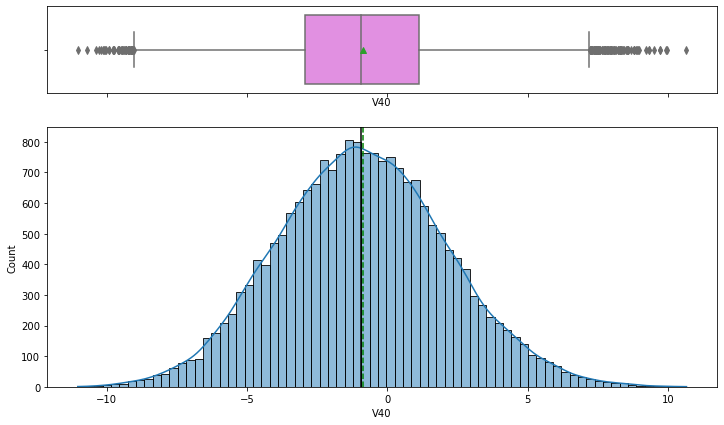

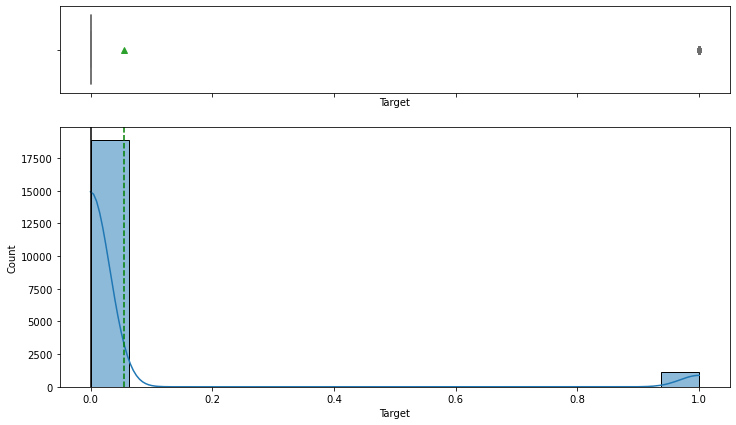

<IPython.core.display.Javascript object>

In [19]:
for feature in data_train.columns:
    histogram_boxplot(data_train, feature, figsize=(12, 7), kde=True, bins=None)

**Observations:**
- There are outliers in the dataset but we will not treat them as they are part of the dataset.
- All distributions are approximately normal.
- The majority class is `No failure`. There is sign of imbalance.

#### Checking for class imbalance

In [20]:
# Checking for class imbalance in the training set
data_train.Target.value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

In [21]:
# Checking for class imbalance for the test set
data_test.Target.value_counts(1)

0   0.944
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
- Both train and test set have similar class ratio. 
- ~94% of the recorded are 0 (No failure).
- ~5% of the recorded are 1 (Failure).

## Data Pre-processing

#### Divide the training dataset to X and y

In [22]:
X = data_train.drop(["Target"], axis=1)
y = data_train["Target"]

<IPython.core.display.Javascript object>

#### Splitting the training dataset to X_train, y_train, X_val, y_val

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [24]:
print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)

Training set shape:  (15000, 40)
Validation set shape:  (5000, 40)


<IPython.core.display.Javascript object>

#### Divide the test dataset to X and y

In [25]:
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

print("Test set shape: ", X_test.shape)

Test set shape:  (5000, 40)


<IPython.core.display.Javascript object>

**Observations:**
- The training, validation and test set are splitted appropriately.

## Missing value imputation




In [26]:
# creating an instance of the imputer to be used, impute 'median' to all the missing data
imputer = SimpleImputer(strategy="median")

# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

<IPython.core.display.Javascript object>

#### Checking for missing value

In [27]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

**Observations:**
- All missing data has been imputed.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- `True positives` (TP) are failures correctly predicted by the model.
- `False negatives` (FN) are real failures in a generator where there is no detection by model. 
- `False positives` (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want `Recall` to be maximized as greater the `Recall`, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [29]:
def comparison_plot(result, names):
    fig = plt.figure(figsize=(10, 7))

    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)

    plt.boxplot(result)
    ax.set_xticklabels(names)

    plt.show()

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize `Recall`.
- To maximize Recall, we can use `Recall` as a **scorer** in cross-validation and hyperparameter tuning.

In [30]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [31]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training set with original data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training set with original data:

dtree: 0.6982829521679532
Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.8100497799581561

Validation Performance:

dtree: 0.7050359712230215
Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8309352517985612


<IPython.core.display.Javascript object>

### Comparison Summary

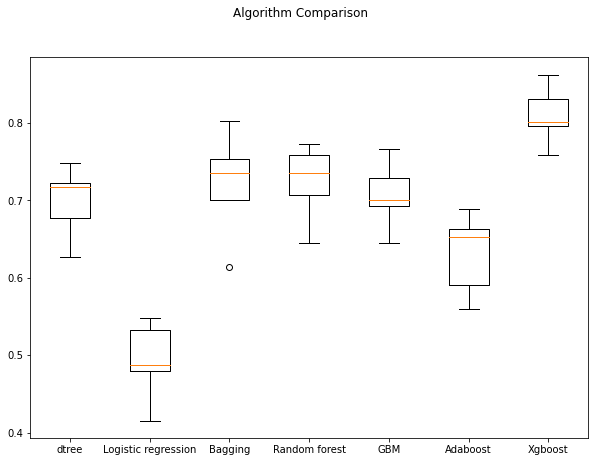

<IPython.core.display.Javascript object>

In [32]:
comparison_plot(results1, names)

##### Observations:
- Both train and validation model with original data are generalized. 
- On average, the majority of the CV scores range from 0.65 to 0.8. 
- The score can be improved with hyperparameter tuning.

### Model Building with Oversampled data


#### Original dataset before SMOTE

X_train with original data: (15000, 40)
y_train with original data: (15000,) 



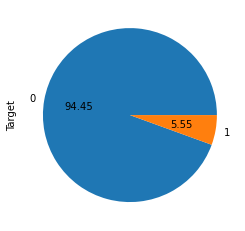

<IPython.core.display.Javascript object>

In [37]:
print("X_train with original data: {}".format(X_train.shape))
print("y_train with original data: {} \n".format(y_train.shape))
ax = y_train.value_counts().plot.pie(autopct="%.2f")

In [34]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

#### Dataset after oversampled using SMOTE

X_train with oversampled data: (28336, 40)
y_train with oversampled data: (28336,) 



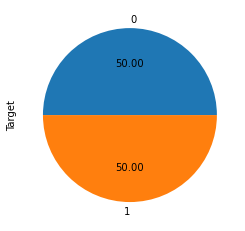

<IPython.core.display.Javascript object>

In [35]:
print("X_train with oversampled data: {}".format(X_train_over.shape))
print("y_train with oversampled data: {} \n".format(y_train_over.shape))
ax = y_train_over.value_counts().plot.pie(autopct="%.2f")

**Observations:**
- The class distribution is balanced after oversampled using SMOTE.

In [38]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training set with oversampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training set with oversampled data:

dtree: 0.9720494245534969
Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.9891305241357218

Validation Performance:

dtree: 0.7769784172661871
Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439


<IPython.core.display.Javascript object>

### Comparison Summary

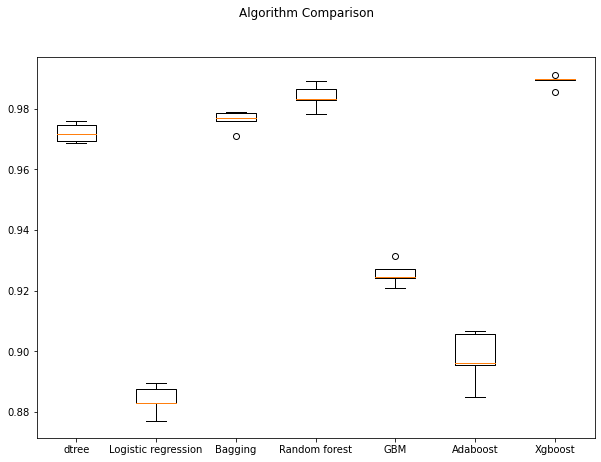

<IPython.core.display.Javascript object>

In [39]:
comparison_plot(results1, names)

**Observations:**
- Both train and validation models on the oversampled data perform better than the models with original data (>0.85).
- However, there are signs of overfitting. There are big drops from the CV scores on the validation set.
- Can be improved with hyperparameter tuning.

### Model Building with Undersampled data

In [40]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

#### Dataset after Random undersampling

X_train with undersampled data: (1664, 40)
y_train with undersampled data: (1664,) 



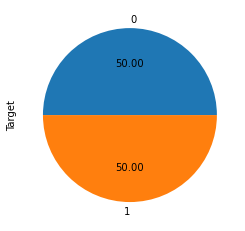

<IPython.core.display.Javascript object>

In [41]:
print("X_train with undersampled data: {}".format(X_train_un.shape))
print("y_train with undersampled data: {} \n".format(y_train_un.shape))
ax = y_train_un.value_counts().plot.pie(autopct="%.2f")

In [42]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training set with undersampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training set with undersampled data:

dtree: 0.8617776495202367
Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9014717552846114

Validation Performance:

dtree: 0.841726618705036
Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.89568345323741


<IPython.core.display.Javascript object>

## Comparison Summary

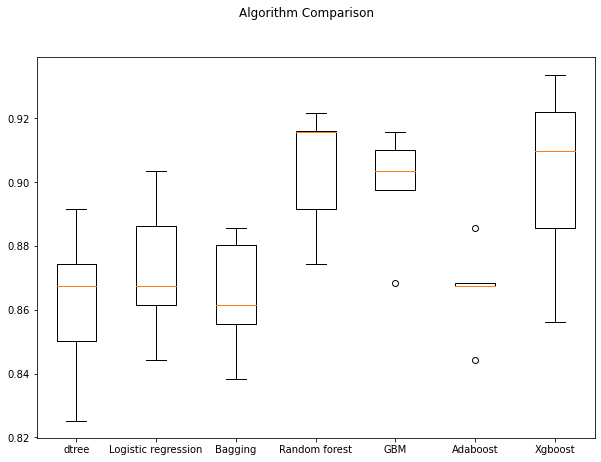

<IPython.core.display.Javascript object>

In [44]:
comparison_plot(results1, names)

**Observations:**
- Both train an validation models are generalized with undersampled data. 
- The average CV scores is lower than the models with oversampled data. (~0.8 to ~0.92).
- Can be improved via hyperparameter tuning.

## Hyperparameter Tuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Decision Tree

#### Sample tuning method for Decision tree with original data

In [45]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


<IPython.core.display.Javascript object>

In [46]:
# Tuned dtree with original dataset
dtree1 = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.001, max_leaf_nodes=15, max_depth=5
)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

<IPython.core.display.Javascript object>

#### Sample tuning method for Decision tree with oversampled data

In [47]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


<IPython.core.display.Javascript object>

In [48]:
# Tuned dtree with oversampled dataset
dtree2 = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.001, max_leaf_nodes=15, max_depth=3
)
dtree2.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

<IPython.core.display.Javascript object>

#### Sample tuning method for Decision tree with undersampled data

In [49]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 20),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


<IPython.core.display.Javascript object>

In [50]:
# Tuned dtree with undersampled dataset
dtree3 = DecisionTreeClassifier(
    min_samples_leaf=1, min_impurity_decrease=0.001, max_leaf_nodes=5, max_depth=2
)
dtree3.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

<IPython.core.display.Javascript object>

### Decision Tree Performance

In [51]:
# Decision Tree Tuned model with original data performance
dtree1_train_perf = model_performance_classification_sklearn(dtree1, X_train, y_train)
dtree1_val_perf = model_performance_classification_sklearn(dtree1, X_val, y_val)

<IPython.core.display.Javascript object>

In [52]:
#Decision Tree Tuned model with oversampled data performance
dtree2_train_perf = model_performance_classification_sklearn(dtree2, X_train_over, y_train_over)
dtree2_val_perf = model_performance_classification_sklearn(dtree2, X_val, y_val)


<IPython.core.display.Javascript object>

In [53]:
#Decision Tree Tuned model with undersampled data performance
dtree3_train_perf = model_performance_classification_sklearn(dtree3, X_train_un, y_train_un)
dtree3_val_perf = model_performance_classification_sklearn(dtree3, X_val, y_val)


<IPython.core.display.Javascript object>

In [54]:
# Create a composition of all performance in a dataframe
dtree_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree1_val_perf.T,
        dtree2_train_perf.T,
        dtree2_val_perf.T,
        dtree3_train_perf.T,
        dtree3_val_perf.T,
    ],
    axis=1,
)
dtree_comp_df.columns = [
    "Decision Tree Tuned on training set with original data",
    "Decision Tree Tuned on validation set with original data",
    "Decision Tree Tuned on training set with oversampled data",
    "Decision Tree Tuned on validation set with oversampled data",
    "Decision Tree Tuned on training set with undersampled data",
    "Decision Tree Tuned on validation set with undersampled data",
]
print("Decision Tree Summary")
dtree_comp_df

Decision Tree Summary


,Decision Tree Tuned on training set with original data,Decision Tree Tuned on validation set with original data,Decision Tree Tuned on training set with oversampled data,Decision Tree Tuned on validation set with oversampled data,Decision Tree Tuned on training set with undersampled data,Decision Tree Tuned on validation set with undersampled data
Accuracy,0.973,0.969,0.843,0.763,0.764,0.609
Recall,0.579,0.576,0.917,0.885,0.909,0.888
Precision,0.891,0.816,0.799,0.176,0.705,0.114
F1,0.702,0.675,0.854,0.294,0.794,0.202


<IPython.core.display.Javascript object>

**Observations:**

- After hyperparameter tuning, all models have generalized performance.
- Since we are trying to maximize the `Recall`, **the decision tree tuned with oversampled data** has the best score performance.

### Logistic Regression

#### Sample tuning method for Logistic Regression with original data

In [55]:
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"C": np.arange(0.1, 1.1, 0.1)}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'C': 0.2} with CV score=0.4952240098117019:


<IPython.core.display.Javascript object>

In [56]:
# logistic regresssion with original data
logReg1 = LogisticRegression(C=0.2)
logReg1.fit(X_train, y_train)

LogisticRegression(C=0.2)

<IPython.core.display.Javascript object>

#### Sample tuning method for Logistic Regression with oversampled data

In [57]:
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"C": np.arange(0.1, 1.1, 0.1)}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'C': 0.1} with CV score=0.8838231041005031:


<IPython.core.display.Javascript object>

In [58]:
# logistic regresssion with oversampled data
logReg2 = LogisticRegression(C=0.1)
logReg2.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1)

<IPython.core.display.Javascript object>

#### Sample tuning method for Logistic Regression with undersampled data

In [59]:
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"C": np.arange(0.1, 1.1, 0.1)}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'C': 0.1} with CV score=0.8653560349181155:


<IPython.core.display.Javascript object>

In [60]:
# logistic regresssion with undersampled data
logReg3 = LogisticRegression(C=0.1)
logReg3.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1)

<IPython.core.display.Javascript object>

### Logistic Regression Performance

In [61]:
logReg1_train_perf = model_performance_classification_sklearn(logReg1, X_train, y_train)
logReg1_val_perf = model_performance_classification_sklearn(logReg1, X_val, y_val)

<IPython.core.display.Javascript object>

In [62]:
logReg2_train_perf = model_performance_classification_sklearn(logReg2, X_train_over, y_train_over)
logReg2_val_perf = model_performance_classification_sklearn(logReg2, X_val, y_val)


<IPython.core.display.Javascript object>

In [63]:
logReg3_train_perf = model_performance_classification_sklearn(
    logReg3, X_train_un, y_train_un
)
logReg3_val_perf = model_performance_classification_sklearn(logReg3, X_val, y_val)

<IPython.core.display.Javascript object>

In [66]:
# Create a composition of all performance in a dataframe
logistic_reg_comp_df = pd.concat(
    [
        logReg1_train_perf.T,
        logReg1_val_perf.T,
        logReg2_train_perf.T,
        logReg2_val_perf.T,
        logReg3_train_perf.T,
        logReg3_val_perf.T,
    ],
    axis=1,
)
logistic_reg_comp_df.columns = [
    "Logistic Regression Tuned on training set with original data",
    "Logistic Regression Tuned on validation set with original data",
    "Logistic Regression Tuned on training set with oversampled data",
    "Logistic Regression Tuned on validation set with oversampled data",
    "Logistic Regression Tuned on training set with undersampled data",
    "Logistic Regression Tuned on validation set with undersampled data",
]
print("Logistic Regression Summary")
logistic_reg_comp_df

Logistic Regression Summary


,Logistic Regression Tuned on training set with original data,Logistic Regression Tuned on validation set with original data,Logistic Regression Tuned on training set with oversampled data,Logistic Regression Tuned on validation set with oversampled data,Logistic Regression Tuned on training set with undersampled data,Logistic Regression Tuned on validation set with undersampled data
Accuracy,0.9669,0.9662,0.8804,0.8684,0.8732,0.8570
Recall,0.4952,0.4820,0.8840,0.8489,0.8750,0.8525
Precision,0.8443,0.8428,0.8776,0.2770,0.8719,0.2602
F1,0.6242,0.6133,0.8808,0.4177,0.8734,0.3987


<IPython.core.display.Javascript object>

**Observations:**

- All models perform generalized.
- The model give the highest `Recall` is **the Logistic Regression Tuned with undersampled data.**

### Bagging

#### Sample tuning method for Bagging with original data


In [67]:
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7308563595700166:


<IPython.core.display.Javascript object>

In [68]:
# original dataset
bagging1 = BaggingClassifier(n_estimators=70, max_samples=0.8, max_features=0.9)
bagging1.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70)

<IPython.core.display.Javascript object>

#### Sample tuning method for Bagging with oversampled data


In [69]:
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:


<IPython.core.display.Javascript object>

In [70]:
# oversampled dataset
bagging2 = BaggingClassifier(n_estimators=70, max_samples=0.9, max_features=0.8)
bagging2.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

<IPython.core.display.Javascript object>

#### Sample tuning method for Bagging with undersampled data


In [71]:
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:


<IPython.core.display.Javascript object>

In [72]:
# undersampled dataset
bagging3 = BaggingClassifier(n_estimators=70, max_samples=0.9, max_features=0.9)
bagging3.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

<IPython.core.display.Javascript object>

### Bagging Performance

In [73]:
bagging1_train_perf = model_performance_classification_sklearn(bagging1, X_train, y_train)
bagging1_val_perf = model_performance_classification_sklearn(bagging1, X_val, y_val)


<IPython.core.display.Javascript object>

In [74]:
bagging2_train_perf = model_performance_classification_sklearn(
    bagging2, X_train_over, y_train_over
)
bagging2_val_perf = model_performance_classification_sklearn(bagging2, X_val, y_val)

<IPython.core.display.Javascript object>

In [75]:
bagging3_train_perf = model_performance_classification_sklearn(bagging3, X_train_un, y_train_un)
bagging3_val_perf = model_performance_classification_sklearn(bagging3, X_val, y_val)


<IPython.core.display.Javascript object>

In [76]:
# Create a composition of all performance in a dataframe
bagging_comp_df = pd.concat(
    [
        bagging1_train_perf.T,
        bagging1_val_perf.T,
        bagging2_train_perf.T,
        bagging2_val_perf.T,
        bagging3_train_perf.T,
        bagging3_val_perf.T,
    ],
    axis=1,
)
bagging_comp_df.columns = [
    "Bagging Tuned on training set with original data",
    "Bagging Tuned on validation set with original data",
    "Bagging Tuned on training set with oversampled data",
    "Bagging Tuned on validation set with oversampled data",
    "Bagging Tuned on training set with undersampled data",
    "Bagging Tuned on validation set with undersampled data",
]
print("Bagging Summary")
bagging_comp_df

Bagging Summary


,Bagging Tuned on training set with original data,Bagging Tuned on validation set with original data,Bagging Tuned on training set with oversampled data,Bagging Tuned on validation set with oversampled data,Bagging Tuned on training set with undersampled data,Bagging Tuned on validation set with undersampled data
Accuracy,0.9984,0.9838,0.9999,0.9858,0.9982,0.9374
Recall,0.9712,0.7374,0.9999,0.8705,0.9976,0.8885
Precision,1.0000,0.9624,0.9999,0.8736,0.9988,0.4669
F1,0.9854,0.8350,0.9999,0.8721,0.9982,0.6121


<IPython.core.display.Javascript object>

**Observations:**

- All models performs generalized.
- There is sign of minor overfitting, since there is a bit of a drop in `Recall` score.
- The Bagging tuned model with undersampled data has the highest `Recall`.

### Random Forest

#### Sample tuning method for Random Forest with original data

In [77]:
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


<IPython.core.display.Javascript object>

In [78]:
# original dataset
rf1 = RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)
rf1.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

<IPython.core.display.Javascript object>

#### Sample tuning method for Random Forest with oversampled data

In [79]:
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815078165615898:


<IPython.core.display.Javascript object>

In [80]:
# oversampled dataset
rf2 = RandomForestClassifier(
    n_estimators=300, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)
rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

<IPython.core.display.Javascript object>

#### Sample tuning method for Random Forest with undersampled data


In [81]:
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:


<IPython.core.display.Javascript object>

In [82]:
# undersampled dataset
rf3 = RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_samples=0.6, max_features="sqrt"
)
rf3.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

<IPython.core.display.Javascript object>

### Random Forest Performance

In [83]:
rf1_train_perf = model_performance_classification_sklearn(rf1, X_train, y_train)
rf1_val_perf = model_performance_classification_sklearn(rf1, X_val, y_val)

<IPython.core.display.Javascript object>

In [84]:
rf2_train_perf = model_performance_classification_sklearn(rf2, X_train_over, y_train_over)
rf2_val_perf = model_performance_classification_sklearn(rf2, X_val, y_val)


<IPython.core.display.Javascript object>

In [85]:
rf3_train_perf = model_performance_classification_sklearn(rf3, X_train_un, y_train_un)
rf3_val_perf = model_performance_classification_sklearn(rf3, X_val, y_val)

<IPython.core.display.Javascript object>

In [86]:
# Create a composition of all performance in a dataframe
rf_comp_df = pd.concat(
    [
        rf1_train_perf.T,
        rf1_val_perf.T,
        rf2_train_perf.T,
        rf2_val_perf.T,
        rf3_train_perf.T,
        rf3_val_perf.T,
    ],
    axis=1,
)
rf_comp_df.columns = [
    "Random Forest Tuned on training set with original data",
    "Random Forest Tuned on validation set with original data",
    "Random Forest Tuned on training set with oversampled data",
    "Random Forest Tuned on validation set with oversampled data",
    "Random Forest Tuned on training set with undersampled data",
    "Random Forest Tuned on validation set with undersampled data",
]
print("Random Forest Summary")
rf_comp_df


Random Forest Summary


,Random Forest Tuned on training set with original data,Random Forest Tuned on validation set with original data,Random Forest Tuned on training set with oversampled data,Random Forest Tuned on validation set with oversampled data,Random Forest Tuned on training set with undersampled data,Random Forest Tuned on validation set with undersampled data
Accuracy,0.9947,0.9842,0.9996,0.9890,0.9856,0.9414
Recall,0.9050,0.7266,0.9994,0.8669,0.9724,0.8885
Precision,1.0000,0.9854,0.9999,0.9305,0.9988,0.4853
F1,0.9502,0.8364,0.9996,0.8976,0.9854,0.6277


<IPython.core.display.Javascript object>

**Observations:**

- All models performs generalized.
- **The Random Forest tuned with undersampled data** has the highest `Recall`.


### Gradient Boosting

#### Sample tuning method for Gradient Boosting with original data


In [87]:
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7536902099415628:


<IPython.core.display.Javascript object>

In [88]:
# original dataset
gb1 = GradientBoostingClassifier(
    subsample=0.7, n_estimators=125, max_features=0.5, learning_rate=0.2
)
gb1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

<IPython.core.display.Javascript object>

#### Sample tuning method for Gradient Boosting with oversampled data


In [89]:
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9726851919894598:


<IPython.core.display.Javascript object>

In [90]:
# oversampled dataset
gb2 = GradientBoostingClassifier(
    subsample=0.7, n_estimators=125, max_features=0.5, learning_rate=1
)
gb2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

<IPython.core.display.Javascript object>

#### Sample tuning method for Gradient Boosting with undersampled data


In [91]:
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=50,
    n_jobs=-1,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9038236779453142:


<IPython.core.display.Javascript object>

In [92]:
# undersampled dataset
gb3 = GradientBoostingClassifier(
    subsample=0.5, n_estimators=125, max_features=0.7, learning_rate=0.2
)
gb3.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, subsample=0.5)

<IPython.core.display.Javascript object>

### Gradient Boosting Performance

In [93]:
gb1_train_perf = model_performance_classification_sklearn(gb1, X_train, y_train)
gb1_val_perf = model_performance_classification_sklearn(gb1, X_val, y_val)


<IPython.core.display.Javascript object>

In [94]:
gb2_train_perf = model_performance_classification_sklearn(gb2, X_train_over, y_train_over)
gb2_val_perf = model_performance_classification_sklearn(gb2, X_val, y_val)


<IPython.core.display.Javascript object>

In [95]:
gb3_train_perf = model_performance_classification_sklearn(gb3, X_train_un, y_train_un)
gb3_val_perf = model_performance_classification_sklearn(gb3, X_val, y_val)

<IPython.core.display.Javascript object>

In [96]:
# Create a composition of all performance in a dataframe
gb_comp_df = pd.concat(
    [
        gb1_train_perf.T,
        gb1_val_perf.T,
        gb2_train_perf.T,
        gb2_val_perf.T,
        gb3_train_perf.T,
        gb3_val_perf.T,
    ],
    axis=1,
)
gb_comp_df.columns = [
    "Gradient Boosting Tuned on training set with original data",
    "Gradient Boosting Tuned on validation set with original data",
    "Gradient Boosting Tuned on training set with oversampled data",
    "Gradient Boosting Tuned on validation set with oversampled data",
    "Gradient Boosting Tuned on training set with undersampled data",
    "Gradient Boosting Tuned on validation set with undersampled data",
]
print("Gradient Boosting Summary")
gb_comp_df



Gradient Boosting Summary


,Gradient Boosting Tuned on training set with original data,Gradient Boosting Tuned on validation set with original data,Gradient Boosting Tuned on training set with oversampled data,Gradient Boosting Tuned on validation set with oversampled data,Gradient Boosting Tuned on training set with undersampled data,Gradient Boosting Tuned on validation set with undersampled data
Accuracy,0.9937,0.9818,0.9896,0.9634,0.9922,0.9272
Recall,0.9002,0.7734,0.9876,0.8381,0.9916,0.8957
Precision,0.9855,0.8848,0.9916,0.6280,0.9928,0.4264
F1,0.9410,0.8253,0.9896,0.7180,0.9922,0.5777


<IPython.core.display.Javascript object>

**Observations:**
- All models performed generalized.
- The gradient boosting tuned with undersampled data gives the highest `Recall`.

### AdaBoost

#### Sample tuning method for Adaboost with original data


In [97]:
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(
    X_train, y_train
)  ## Complete the code to fit the model on over sampled data

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7620734434744969:


<IPython.core.display.Javascript object>

In [98]:
# original dataset
adaboost1 = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
adaboost1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

#### Sample tuning method for Adaboost with oversampled data


In [99]:
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(
    X_train_over, y_train_over
)  ## Complete the code to fit the model on over sampled data

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9714853746337214:


<IPython.core.display.Javascript object>

In [100]:
# oversampled dataset
adaboost2 = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
adaboost2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

#### Sample tuning method for Adaboost with undersampled data


In [101]:
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(
    X_train_un, y_train_un
)  ## Complete the code to fit the model on over sampled data

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/devinho/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 200, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8906283817906356:


<IPython.core.display.Javascript object>

In [102]:
# undersampled dataset
adaboost3 = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
adaboost3.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=200)

<IPython.core.display.Javascript object>

### AdaBoosting Performance

In [103]:
adaboost1_train_perf = model_performance_classification_sklearn(adaboost1, X_train, y_train)
adaboost1_val_perf = model_performance_classification_sklearn(adaboost1, X_val, y_val)


<IPython.core.display.Javascript object>

In [104]:
adaboost2_train_perf = model_performance_classification_sklearn(adaboost2, X_train_over, y_train_over)
adaboost2_val_perf = model_performance_classification_sklearn(adaboost2, X_val, y_val)


<IPython.core.display.Javascript object>

In [105]:
adaboost3_train_perf = model_performance_classification_sklearn( adaboost3, X_train_un, y_train_un)
adaboost3_val_perf = model_performance_classification_sklearn(adaboost3, X_val, y_val)


<IPython.core.display.Javascript object>

In [106]:
#Create a composition of all performance in a dataframe
adaboost_comp_df = pd.concat(
    [
        adaboost1_train_perf.T,
        adaboost1_val_perf.T,
        adaboost2_train_perf.T,
        adaboost2_val_perf.T,
        adaboost3_train_perf.T,
        adaboost3_val_perf.T,
    ],
    axis=1,
)
adaboost_comp_df.columns = [
    "AdaBoosting Tuned on training set with original data",
    "AdaBoosting Tuned on validation set with original data",
    "AdaBoosting Tuned on training set with oversampled data",
    "AdaBoosting Tuned on validation set with oversampled data",
    "AdaBoosting Tuned on training set with undersampled data",
    "AdaBoosting Tuned on validation set with undersampled data",
]
print("AdaBoosting Summary")
adaboost_comp_df



AdaBoosting Summary


,AdaBoosting Tuned on training set with original data,AdaBoosting Tuned on validation set with original data,AdaBoosting Tuned on training set with oversampled data,AdaBoosting Tuned on validation set with oversampled data,AdaBoosting Tuned on training set with undersampled data,AdaBoosting Tuned on validation set with undersampled data
Accuracy,0.9991,0.9854,0.9918,0.9792,0.9495,0.9302
Recall,0.9832,0.7554,0.9883,0.8525,0.9159,0.8741
Precision,1.0000,0.9767,0.9952,0.7900,0.9820,0.4363
F1,0.9915,0.8519,0.9917,0.8201,0.9478,0.5820


<IPython.core.display.Javascript object>

**Observations:**
- All models perform generalized.
- The Adaboost Tuned with undersampled data gives the highest `Recall`.

### XGBoost

#### Sample tuning method for XGboost with original data


In [107]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.8582136930957363:


<IPython.core.display.Javascript object>

In [108]:
# original dataset
xg1 = XGBClassifier(
    subsample=0.8, scale_pos_weight=10, n_estimators=200, learning_rate=0.2, gamma=5
)
xg1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<IPython.core.display.Javascript object>

#### Sample tuning method for XGboost with oversampled data


In [109]:
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9960475154078072:


<IPython.core.display.Javascript object>

In [110]:
# oversampled dataset
xg2 = XGBClassifier(
    subsample=0.9, scale_pos_weight=10, n_estimators=150, learning_rate=0.1, gamma=0
)
xg2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<IPython.core.display.Javascript object>

#### Sample tuning method for XGboost with undersampled data


In [111]:
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9290599523843879:


<IPython.core.display.Javascript object>

In [112]:
# undersampled dataset
xg3 = XGBClassifier(
    subsample=0.9, scale_pos_weight=10, n_estimators=200, learning_rate=0.1, gamma=5
)
xg3.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<IPython.core.display.Javascript object>

### XGBoosting Performance

In [113]:
xg1_train_perf = model_performance_classification_sklearn(xg1, X_train, y_train)
xg1_val_perf = model_performance_classification_sklearn(xg1, X_val, y_val)


<IPython.core.display.Javascript object>

In [114]:
xg2_train_perf = model_performance_classification_sklearn(
    xg2, X_train_over, y_train_over
)
xg2_val_perf = model_performance_classification_sklearn(xg2, X_val, y_val)

<IPython.core.display.Javascript object>

In [115]:
xg3_train_perf = model_performance_classification_sklearn(xg3, X_train_un, y_train_un)
xg3_val_perf = model_performance_classification_sklearn(xg3, X_val, y_val)


<IPython.core.display.Javascript object>

In [116]:
#Create a composition of all performance in a dataframe
xgb_comp_df = pd.concat(
    [
        xg1_train_perf.T,
        xg1_val_perf.T,
        xg2_train_perf.T,
        xg2_val_perf.T,
        xg3_train_perf.T,
        xg3_val_perf.T,
    ],
    axis=1,
)
xgb_comp_df.columns = [
    "XGBoosting Tuned on training set with original data",
    "XGBoosting Tuned on validation set with original data",
    "XGBoosting Tuned on training set with oversampled data",
    "XGBoosting Tuned on validation set with oversampled data",
    "XGBoosting Tuned on training set with undersampled data",
    "XGBoosting Tuned on validation set with undersampled data",
]
print("XGBoosting Summary")
xgb_comp_df



XGBoosting Summary


,XGBoosting Tuned on training set with original data,XGBoosting Tuned on validation set with original data,XGBoosting Tuned on training set with oversampled data,XGBoosting Tuned on validation set with oversampled data,XGBoosting Tuned on training set with undersampled data,XGBoosting Tuned on validation set with undersampled data
Accuracy,0.9985,0.9880,0.9936,0.9690,0.9724,0.8234
Recall,1.0000,0.8633,1.0000,0.8921,1.0000,0.9173
Precision,0.9731,0.9160,0.9873,0.6649,0.9476,0.2287
F1,0.9864,0.8889,0.9936,0.7619,0.9731,0.3661


<IPython.core.display.Javascript object>

**Observations:**
- The XGBoosting Tuned with undersampled data gives the highest `Recall`.

## Model performance comparison and choosing the final model

In [120]:
model_comp_df = pd.concat(
    [
        dtree1_val_perf.T,
        dtree2_val_perf.T,
        dtree3_val_perf.T,
        logReg1_val_perf.T,
        logReg2_val_perf.T,
        logReg2_val_perf.T,
        bagging1_val_perf.T,
        bagging2_val_perf.T,
        bagging3_val_perf.T,
        rf1_val_perf.T,
        rf2_val_perf.T,
        rf3_val_perf.T,
        gb1_val_perf.T,
        gb2_val_perf.T,
        gb3_val_perf.T,
        adaboost1_val_perf.T,
        adaboost1_val_perf.T,
        adaboost1_val_perf.T,
        xg1_val_perf.T,
        xg2_val_perf.T,
        xg3_val_perf.T,       
    ],
    axis=1,
)
model_comp_df.columns = [
    "Tuned Decision tree with original data",
    "Tuned Decision tree with oversampled data",
    "Tuned Decision tree with undersampled data",
    "Tuned Logistic Regression with original data",
    "Tuned Logistic Regression with oversampled data",
    "Tuned Logistic Regression with undersampled data",
    "Tuned Bagging with original data",
    "Tuned Bagging with oversampled data",
    "Tuned Bagging with undersampled data",
    "Tuned Random Forest with original data",
    "Tuned Random Forest with oversampled data",
    "Tuned Random Forest with undersampled data",
    "Tuned Gradient Boosting with original data",
    "Tuned Gradient Boosting with oversampled data",
    "Tuned Gradient Boosting with undersampled data",
    "Tuned AdaBoosting with original data",
    "Tuned AdaBoosting with oversampled data",
    "Tuned AdaBoosting with undersampled data",
    "Tuned XGBoosting with original data",
    "Tuned XGBoosting with oversampled data",
    "Tuned XGBoosting with undersampled data",
    
]
print("Performance Comparison Summary")
model_comp_df


Performance Comparison Summary


,Tuned Decision tree with original data,Tuned Decision tree with oversampled data,Tuned Decision tree with undersampled data,Tuned Logistic Regression with original data,Tuned Logistic Regression with oversampled data,Tuned Logistic Regression with undersampled data,Tuned Bagging with original data,Tuned Bagging with oversampled data,Tuned Bagging with undersampled data,Tuned Random Forest with original data,Tuned Random Forest with oversampled data,Tuned Random Forest with undersampled data,Tuned Gradient Boosting with original data,Tuned Gradient Boosting with oversampled data,Tuned Gradient Boosting with undersampled data,Tuned AdaBoosting with original data,Tuned AdaBoosting with oversampled data,Tuned AdaBoosting with undersampled data,Tuned XGBoosting with original data,Tuned XGBoosting with oversampled data,Tuned XGBoosting with undersampled data
Accuracy,0.9692,0.7632,0.6090,0.9662,0.8684,0.8684,0.9838,0.9858,0.9374,0.9842,0.9890,0.9414,0.9818,0.9634,0.9272,0.9854,0.9854,0.9854,0.9880,0.9690,0.8234
Recall,0.5755,0.8849,0.8885,0.4820,0.8489,0.8489,0.7374,0.8705,0.8885,0.7266,0.8669,0.8885,0.7734,0.8381,0.8957,0.7554,0.7554,0.7554,0.8633,0.8921,0.9173
Precision,0.8163,0.1760,0.1138,0.8428,0.2770,0.2770,0.9624,0.8736,0.4669,0.9854,0.9305,0.4853,0.8848,0.6280,0.4264,0.9767,0.9767,0.9767,0.9160,0.6649,0.2287
F1,0.6751,0.2936,0.2017,0.6133,0.4177,0.4177,0.8350,0.8721,0.6121,0.8364,0.8976,0.6277,0.8253,0.7180,0.5777,0.8519,0.8519,0.8519,0.8889,0.7619,0.3661


<IPython.core.display.Javascript object>

**Observations:**
- The Tuned XGBoosting with undersampled data gives the highest `Recall` score.

### Test set final performance

In [121]:
final_model_perf = model_performance_classification_sklearn(xg3, X_test, y_test)
print("Test Performance")
final_model_perf

Test Performance


,Accuracy,Recall,Precision,F1
0,0.8296,0.8901,0.2341,0.3708


<IPython.core.display.Javascript object>

**Feature Importances**

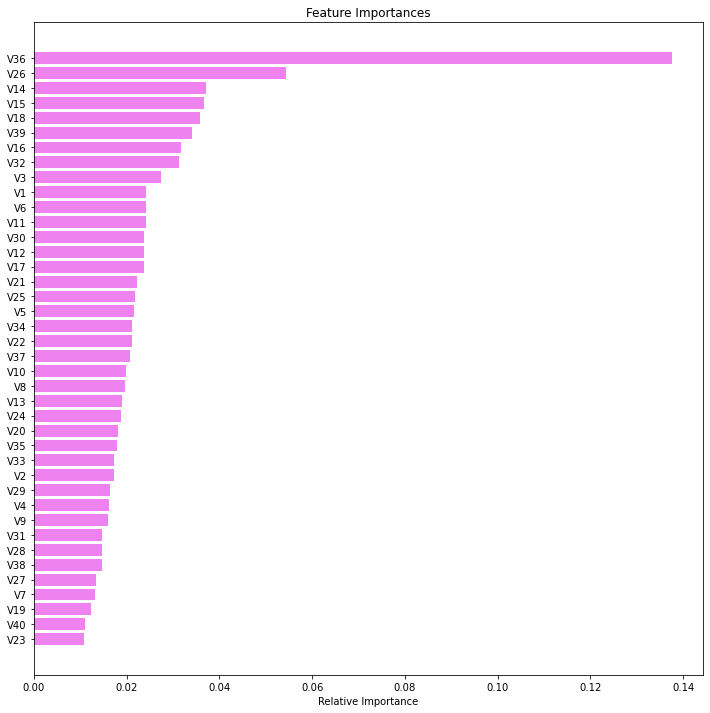

<IPython.core.display.Javascript object>

In [122]:
feature_names = X_train.columns
importances = xg3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- V36, V26, V14, V15, V18 are top 5 important features.

## Pipelines to build the final model


In [124]:
Pipeline_model = Pipeline(
    steps=[
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                eval_metric="logloss",
                subsample=0.9, 
                scale_pos_weight=10, 
                n_estimators=200, 
                learning_rate=0.1, 
                gamma=5
            ),
        ),
    ]
)


<IPython.core.display.Javascript object>

In [126]:
# Separating target variable and other variables on train set
X1 = data_train.drop(columns="Target")
Y1 = data_train["Target"]
# Separating target variable and other variables on test set
X_test1 = data_test.drop(columns="Target")
y_test1 = data_test['Target'] 


<IPython.core.display.Javascript object>

In [127]:
# Perform imputing missing values
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

<IPython.core.display.Javascript object>

In [132]:
# undersampling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un1, y_train_un1 = rus.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [133]:
Pipeline_model.fit(X_train_un1, y_train_un1)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

<IPython.core.display.Javascript object>

In [134]:
Pipeline_model_test = model_performance_classification_sklearn(
    Pipeline_model, X_test1, y_test1
)
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.8378,0.8901,0.2435,0.3823


<IPython.core.display.Javascript object>

# Business Insights and Conclusions

- Since the inspection cost is less than the repair cost, and the repair cost is less than the replacement cost, the goal is to maximize the `Recall` score in the classification model. 
- Company is recommended to predict failure before hand to minimize the cost of replacement.
- I have trained multiple models and performed validation testing to compare the performance among all models with the original data, oversampled data, and undersampled data. 
- The models with original data show sign of overfitting and low performance.
- The models with oversampled data also show sign of minor-overfitting, but the performance is better than the models with original data.
- The models with undersampled data perform generalized, and perform better than the models with original data.
- Best pipeline model: **`Tuned XGBoosting with undersampled data`**.
> Best parameters are { `subsample = 0.9`, `scale_pos_weight = 10`, `n_estimators = 200`, `learning_rate = 0.1`, `gamma = 5`} with **CV score=0.929**
- The Tuned XGBoosting with undersampled data gives the `Recall` score of **0.8901** with test data.
- Top 5 important features:  V36, V26, V14, V15, V18
- Even though the best pipeline model gives the highest `Recall` score, its `Accuracy` is ~83%, its `F1` is ~40%. The company is recommended to consider other factors that contribute to the failure detection.
- It is recommended to keep the model updated to ensure the performance, to avoid wrongfully failure detection.

***